In [6]:
# Initialization

import math
from datetime import datetime
import openpyxl as opxl
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go

import sklearn.metrics
import scipy.integrate as integrate
import scipy.optimize as sco

import fluids as fds
import ht 

import general as gen
import model as ty
import proc as pr
import heat_transfer as bht
import plot_functions as pfun
# importing sys
import sys
sys.path.insert(0,r'C:\Users\valen\Dropbox (DualSun)\PC\Documents\GitHub\RD-systems-and-test-benches')
import SK_standard as sk

In [7]:
input_name = r'\Inputs_V4.1.xlsx'
hyp_name = r'\Model_hypotheses_V4.1.xlsx'
data_name = r'\TUV_test_conditions_V4.1NI_MPP.xlsx'

par = pr.import_input(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Inputs',input_name)
hyp = pr.create_dict_from_excel(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Hypotheses',hyp_name,'Main')
condi = pr.create_inputs_from_excel(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Steady-state conditions inputs'+data_name,par,hyp)

{'exchanger': {'name': 'xxx', 'eta_nom': 0.2, 'Eff_T': -0.0034000000000000002, 'T_ref': 298.15, 'Eff_G': 0, 'G_ref': 1000, 'X_corr': 1, 'tau_alpha': 0.8, 'eps': 0.95, 'eps_bs': 1, 'w_pan': 1.14, 'L_pan': 1.7, 'orientation': 'portrait', 'lambd_upper_glass': 0.00278, 'lambd_upper_EVA': 0.000515, 'lambd_si': 0.00015, 'lambd_lower_EVA': 0.000515, 'lambd_PVDF': 2.9999999999999997e-05, 'lambd_PET': 0.00027, 'lambd_adh': 0.0, 'lambd_lower_glass': 0.0, 'k_glass': 0.8, 'k_EVA': 0.24, 'k_si': 60, 'k_PVDF': 0.2, 'k_PET': 0.3, 'k_adh': 0.2, 'L_abs': 1.55, 'w_abs': 1.08, 'geometry': 'meander', 'N_harp': 1, 'N_meander': 16, 'L_tube': 1.05, 'tube_geometry': 'circular', 'H_tube': 0.008, 'w_tube': 0.008, 'W': 0.096875, 'l_c': 0.0005, 'p_ext_tube': 0.025132741228718346, 'p_ext_tube_rad': 0.012566370614359173, 'lambd_air': 0.0, 'lambd_conductive_plate': 0.0, 'lambd_abs': 0.0004, 'lambd_riser_plate': 0.002, 'lambd_riser_back': 0.002, 'lambd_ins': 0.0, 'eps_he': 0.05, 'eps_ins': 0.7, 'k_air': 0.025, 'k_con

In [8]:
df_res,X,list_res,list_df,list_df_historic = ty.simu_condi(par,hyp,condi)

In [9]:
dfL = pd.DataFrame(np.array([20,30,40,50,60,80,100,120,140,160,180,200]),columns=['N_f2'])

In [10]:
par["exchanger"]["D"]

0.02625

In [11]:
A0_list = []
A1_list = []

for i in range(len(dfL)):
    par["exchanger"]["N_f2"] = dfL['N_f2'][i]
    par["exchanger"]["N_ail"] = dfL['N_f2'][i]
    par["exchanger"]["D"] = par["exchanger"]["L_tube"]/dfL['N_f2'][i]
    print(par["exchanger"]["N_f2"])
    df_res,X,list_res,list_df,list_df_historic = ty.simu_condi(par,hyp,condi)
    [tab_m,X_m] = sk.find_SK_SST(df_res,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
    A0_list.append(X_m[0][0]-X_m[0][6]*(1.3-3))
    A1_list.append(X_m[0][1]+X_m[0][3]*(1.3-3))

20
30
40
50
60
80
100
120
140
160
180
200


In [12]:
dfL['A0'] = A0_list
dfL['A1'] = A1_list

In [14]:
dfL["D"] = par["exchanger"]["L_tube"]/dfL['N_f2']

Text(0, 0.5, 'A1')

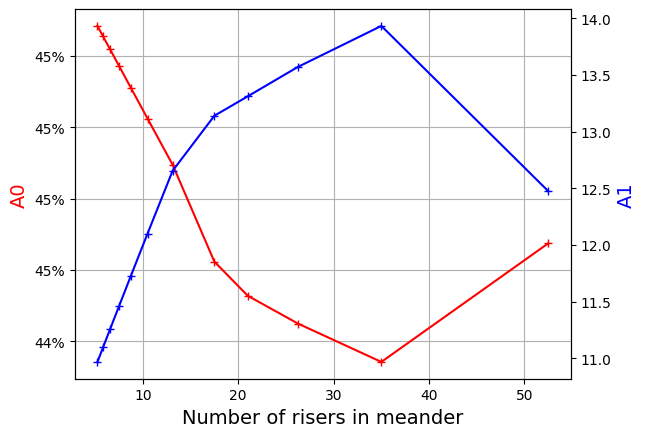

In [15]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot

ax.plot(dfL['D']*1000,dfL['A0']*100,color="red",marker="+")

# set x-axis label

ax.set_xlabel("Number of risers in meander", fontsize = 14)

# set y-axis label

ax.set_ylabel("A0",
              color="red",
              fontsize=14)



# ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ax.axhline(y = 0.999*0.396177,label='98% of the maximum performance',color='green')
# ax.axvline(x = 0.4, label = 'Thickness of the tested prototype',color='black')
# ax.axhline(y = 0.394,color='black')
# ax.axvline(x = 1.3,color='green')
# ax.legend()

ax.grid()
# twin object for two dif       ferent y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfL['D']*1000,dfL['A1'],color="blue",marker="+")
ax2.set_ylabel("A1",color="blue",fontsize=14)

In [ ]:
X[0]

In [ ]:
[tab,X] = sk.find_SK_SST(condi,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df = pd.DataFrame(X[0],index = ['eta0,hem','a1','a2','a3','a4','a5','a6','a7','a8'],columns=['TÜV'])

[tab_m,X_m] = sk.find_SK_SST(df_res,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df['Linear fit model 1D'] = X_m[0]

pr.disp_html(X_df)

In [ ]:
15.86+2.216*(-1.7)

In [ ]:
pr.disp_html(list_res[14]["inlet_man"][1])

In [ ]:
pr.disp_html(list_res[14]["exchanger"][1])

In [ ]:
pr.disp_html(df_res)

In [ ]:
u_list = df_res['u'].unique()

In [ ]:
u_list

In [ ]:
pr.disp_html(df_res)

In [ ]:
# powers = ["Q_S","Q_top_conv","Q_top_rad","Q_tube_back_conv","Q_tube_back_rad","Q_f01"]

df_res["-Q_top_conv"] = -df_res["Q_top_conv"]
df_res["-Q_top_rad"] = -df_res["Q_top_rad"]

df_res["-Q_ins_absfin_back_conv"] = -df_res["Q_ins_absfin_back_conv"]
df_res["-Q_ins_absfin_back_rad"] = -df_res["Q_ins_absfin_back_rad"]
df_res["-Q_tube_back_conv"] = -df_res["Q_tube_back_conv"]
df_res["-Q_tube_back_rad"] = -df_res["Q_tube_back_rad"]
# df_res["-Q_f01"] = -df_res["Q_f01"]

df_select_u = df_res.loc[df_res["u"]==0.7]

powers = ["Q_S","-Q_top_conv","-Q_top_rad","-Q_ins_absfin_back_conv","-Q_ins_absfin_back_rad","-Q_tube_back_conv","-Q_tube_back_rad"]

df_hist = df_select_u

dict_pos = {}
dict_neg = {}
dict_pos_agg = {}
dict_neg_agg = {}

DT_list = []
for DT in df_hist["-(T_m - T_a)"]:
    DT_list.append(-DT)

# powers = ["S_loc","-Q_top_conv","-Q_top_rad","-Q_tube_back"]
# powers = ["S_loc","-Q_top_conv","-Q_top_rad","-Q_fluid_back","-Q_f01"]


for i in range(len(powers)):
    pow = powers[i]

    if i == 0:

    
        dict_pos[pow] = 16*np.array(ty.pos_df(df_hist,pow))
        dict_neg[pow] = 16*np.array(ty.neg_df(df_hist,pow))

    else:
        dict_pos[pow] = np.array(ty.pos_df(df_hist,pow))
        dict_neg[pow] = np.array(ty.neg_df(df_hist,pow))

    if i==0:
        dict_pos_agg[pow] = 0*np.array(ty.pos_df(df_hist,pow))
        dict_neg_agg[pow] = dict_pos_agg[pow]

    else:
        dict_pos_agg[pow] = dict_pos_agg[powers[i-1]] + dict_pos[powers[i-1]]
        dict_neg_agg[pow] = dict_neg_agg[powers[i-1]] + dict_neg[powers[i-1]]

fig, ax = plt.subplots()

width = 0.35

# labels_list = ['Sun','Front convection','Front radiation','Back convection and radiation']
# powers = ["Q_S","-Q_top_conv","-Q_top_rad","-Q_ins_absfin_back_conv","-Q_ins_absfin_back_rad","-Q_tube_back_conv","-Q_tube_back_rad"]
labels_list = powers
colors_list = ['red','blue','cyan','green','lightgreen','orange','purple']

for i,pow in enumerate(powers):
    ax.bar(DT_list, dict_pos[pow], width, bottom=dict_pos_agg[pow], label=labels_list[i], color=colors_list[i])
    ax.bar(DT_list, dict_neg[pow], width, bottom=dict_neg_agg[pow], color=colors_list[i])

ax.plot(DT_list,df_hist["Q_tube_fluid"],color="red",label="Q_fluid")
# ax.plot(labels,np.array(N_disp*[list_PL[q]]))

# ax.set_ylabel('PL (Pa)')
# ax.set_title('SPRING')
ax.set_xlabel("Tm - Ta (K)")
ax.set_ylabel("Qdot (W)")
ax.axhline(y = 0., color = 'g', linestyle = '-')
  
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [ ]:
pfun.plot_graph(df_res,par,1)

In [ ]:
par["exchanger"]["N_meander"]*par["exchanger"]["p_ext_tube"]*par["exchanger"]["L_tube"]*12*(24.943-15.014)

In [ ]:
par["exchanger"]["N_meander"]*par["exchanger"]["Heta"]*par["exchanger"]["W"]*150*2*6*(24.943-15.014)

In [ ]:
# X_df.to_csv('V4.41_glass_backsheet_dark_front_calibrage_h.csv',sep=';')

In [ ]:
u_list = df_res['u'].unique()
fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        name='Model 1D - u = '+str(u_list[i])+' m/s',
                        ))

    
    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=sk.comp_power_rG_coeff_df(X_df['Linear fit model 1D'],df_res.loc[df_res["u"]==u_list[i]]),
                        mode = 'lines',
                        line=dict(width=1,
                            dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s',
                        ))
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=sk.comp_power_rG_coeff_df(X_df['TÜV'],condi.loc[condi["u"]==u_list[i]]),
                        mode = 'lines',
                        line=dict(width=1
                            ),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "V4.1 dark front wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
mse = sklearn.metrics.mean_squared_error(df_res['Qdot / AG'],condi['Qdot / AG'])
print(math.sqrt(mse))
print(math.sqrt(mse)/condi['Qdot / AG'].mean())

In [ ]:
fig.write_html('V4.41_glass_backsheet_dark_front_calibrage_h.html')

In [ ]:
pr.disp_html(df_res)

In [ ]:
[tab,X] = sk.find_SK_SST(condi,par['AG'],columns_list=[0,1,0,1,0,0,0,0,0])
[tab_m,X_m] = sk.find_SK_SST(df_res,par['AG'],columns_list=[0,1,0,1,0,0,0,0,0])

In [ ]:
pr.display_a_i(X)
pr.display_a_i(X_m)

In [ ]:
condi

In [ ]:
pr.disp_html(df_res)

In [ ]:
u_list = [0.7,2.1,3.9]

color_list = ['blue','red','green','orange','cyan','purple']

def lin(x,a,b):
    return a*x+b

popt_mod_list = []
pcov_mod_list = []
popt_tuv_list = []
pcov_tuv_list = []


for i in range(len(u_list)):
    popt,pcov = sco.curve_fit(lin,-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'])
    popt_mod_list.append(popt)
    pcov_mod_list.append(pcov)

    popt,pcov = sco.curve_fit(lin,condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],condi.loc[df_res["u"]==u_list[i]]['Qdot / AG'])
    popt_tuv_list.append(popt)
    pcov_tuv_list.append(pcov)

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i]),
                        name='Model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i+1]),
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )


    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=lin(-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],*popt_mod_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i], width=1,
                              dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=lin(condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],*popt_tuv_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i+1], width=1,
                              dash='dashdot'),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "V4.41 glass-backsheet dark no wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
par["l_B"]